In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
user_data = pd.read_csv('User_Data.csv')

In [3]:
user_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
del[user_data['User ID']]

In [5]:
user_data

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [6]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [7]:
user_data.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
user_data['Gender'] = label.fit_transform(user_data['Gender'])

In [9]:
user_data.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [10]:
user_data.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [11]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()
scaled_data = scaled.fit_transform(user_data.iloc[:,:-1])

In [12]:
user_data_scaled = pd.DataFrame(scaled_data,columns=['Gender', 'Age', 'EstimatedSalary'])
user_data_scaled['Purchased'] = user_data.iloc[:,-1:]

In [13]:
user_data_scaled.head()

,Gender,Age,EstimatedSalary,Purchased
0,1.020204,-1.781797,-1.490046,0
1,1.020204,-0.253587,-1.460681,0
2,-0.980196,-1.113206,-0.785290,0
3,-0.980196,-1.017692,-0.374182,0
4,1.020204,-1.781797,0.183751,0


In [14]:
x = user_data_scaled.iloc[:,:-1]

y = user_data_scaled.iloc[:,-1:]

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

# Logistic regression

In [16]:
from sklearn.linear_model import LogisticRegression
logi = LogisticRegression()
logi.fit(x_train,y_train)
y_pred_logi = logi.predict(x_test)
from sklearn.metrics import accuracy_score
score_logi = accuracy_score(y_test,y_pred_logi)
print(score_logi)
y_pred_logi_train = logi.predict(x_train)
score_logi_train = accuracy_score(y_train,y_pred_logi_train)
score_logi_train

0.825


0.85

# Support Vector Machine

In [17]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)
from sklearn.metrics import accuracy_score
score_svc = accuracy_score(y_test,y_pred_svc)
print(score_svc)
y_pred_svc_train = svc.predict(x_train)
score_svc_train = accuracy_score(y_train,y_pred_svc_train)
score_svc_train

0.8625


0.91875

# K-Nearest Neighbour

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
from sklearn.metrics import accuracy_score
score_knn= accuracy_score(y_test,y_pred_knn)
print(score_knn)
y_pred_knn_train = knn.predict(x_train)
score_knn_train = accuracy_score(y_train,y_pred_knn_train)
score_knn_train

0.85


0.934375

# Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred_nb = nb.predict(x_test)
from sklearn.metrics import accuracy_score
score_nb = accuracy_score(y_test,y_pred_nb)
print(score_nb)
y_pred_nb_train = nb.predict(x_train)
score_nb_train = accuracy_score(y_train,y_pred_nb_train)
score_nb_train

0.85


0.90625

# Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
from sklearn.metrics import accuracy_score
score_dt= accuracy_score(y_test,y_pred_dt)
print(score_dt)
y_pred_dt_train = dt.predict(x_train)
score_dt_train = accuracy_score(y_train,y_pred_dt_train)
score_dt_train

0.775


0.996875

# Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
from sklearn.metrics import accuracy_score
score_rf = accuracy_score(y_test,y_pred_rf)
print(score_rf)
y_pred_rf_train = rf.predict(x_train)
score_rf_train = accuracy_score(y_train,y_pred_rf_train)
score_rf_train

0.85


0.996875

# Gradient Boosting

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred_gb = gb.predict(x_test)
from sklearn.metrics import accuracy_score
score_gb= accuracy_score(y_test,y_pred_gb)
print(score_gb)
y_pred_gb_train = gb.predict(x_train)
score_gb_train = accuracy_score(y_train,y_pred_gb_train)
score_gb_train

0.85


0.98125

# AdaBoost 

In [23]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()
ab.fit(x_train,y_train)
y_pred_ab = ab.predict(x_test)
from sklearn.metrics import accuracy_score
score_ab= accuracy_score(y_test,y_pred_ab)
print(score_ab)
y_pred_ab_train = ab.predict(x_train)
score_ab_train = accuracy_score(y_train,y_pred_ab_train)
score_ab_train

0.875


0.953125

# XGBoost

In [24]:
from xgboost import XGBClassifier
gdb = XGBClassifier()
gdb.fit(x_train,y_train)
y_pred_gdb = gdb.predict(x_test)
from sklearn.metrics import accuracy_score
score_gdb= accuracy_score(y_test,y_pred_gdb)
print(score_gdb)
y_pred_gdb_train = gdb.predict(x_train)
score_gdb_train = accuracy_score(y_train,y_pred_gdb_train)
score_gdb_train

0.8375


0.990625

# Basic Ensemble model

In [25]:
from sklearn.ensemble import VotingClassifier
final_model = VotingClassifier(estimators=[('logi',logi),('svc',svc),('knn',knn),('nb',nb),('dt',dt),('rf',rf),('gb',gb),('ab',ab),('gdb',gdb)])

In [26]:
final_model.fit(x_train,y_train)

VotingClassifier(estimators=[('logi', LogisticRegression()), ('svc', SVC()),
                             ('knn', KNeighborsClassifier()),
                             ('nb', GaussianNB()),
                             ('dt', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('gb', GradientBoostingClassifier()),
                             ('ab', AdaBoostClassifier()),
                             ('gdb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            callbacks=None, colsample_bylevel=1,
                                            colsample_...
                                            eval_metric=None, gamma=0,
                                            gpu_id=-1, grow_policy='depthwise',
                                            importance_type=None,
                                            interaction_constraints='',
               

In [27]:
y_pred_model = final_model.predict(x_test)

In [28]:
y_pred_model_train = final_model.predict(x_train)

In [29]:
y_pred_model

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [30]:
from sklearn.metrics import accuracy_score
score_model = accuracy_score(y_test,y_pred_model)
print(score_model)

score_model_train = accuracy_score(y_train,y_pred_model_train)
score_model_train

0.8625


0.9625

# Result Visualization

In [31]:
dataframe = pd.DataFrame(y_pred_logi,columns=['Logistic regression'])
dataframe['Support Vector Machine'] = y_pred_svc
dataframe['K-Nearest Neighbour'] = y_pred_knn
dataframe['Naive Bayes'] = y_pred_nb
dataframe['Decision Tree'] = y_pred_dt
dataframe['Random Forest'] = y_pred_rf
dataframe['Gradient Boosting'] = y_pred_gb
dataframe['AdaBoost'] = y_pred_ab
dataframe['XGBoost'] = y_pred_gdb
dataframe['Basic Ensemble model'] = y_pred_model
dataframe.head()

,Logistic regression,Support Vector Machine,K-Nearest Neighbour,Naive Bayes,Decision Tree,Random Forest,Gradient Boosting,AdaBoost,XGBoost,Basic Ensemble model
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1
4,0,1,1,0,0,1,0,0,1,0


In [32]:
Algorithithm = ['logistic regression','Support Vector Machine','K-Nearest Neighbour','Naive Bayes','Decision Tree','Random Forest','Gradient Boosting','AdaBoost','XGBoost','Basic Ensemble model']
Accuracy_score_test = [score_logi,score_svc,score_knn,score_nb,score_dt,score_rf,score_gb,score_ab,score_gdb,score_model]
Accuracy_score_train = [score_logi_train,score_svc_train,score_knn_train,score_nb_train,score_dt_train,score_rf_train,score_gb_train,score_ab_train,score_gdb_train,score_model_train]
df = pd.DataFrame(Algorithithm,columns=['Algorithm_Name'])
df['Accuracy_on_Test_Data'] = Accuracy_score_test
df['Accuracy_score_train'] = Accuracy_score_train
df

,Algorithm_Name,Accuracy_on_Test_Data,Accuracy_score_train
0,logistic regression,0.8250,0.850000
1,Support Vector Machine,0.8625,0.918750
2,K-Nearest Neighbour,0.8500,0.934375
3,Naive Bayes,0.8500,0.906250
4,Decision Tree,0.7750,0.996875
5,Random Forest,0.8500,0.996875
6,Gradient Boosting,0.8500,0.981250
7,AdaBoost,0.8750,0.953125
8,XGBoost,0.8375,0.990625
9,Basic Ensemble model,0.8625,0.962500


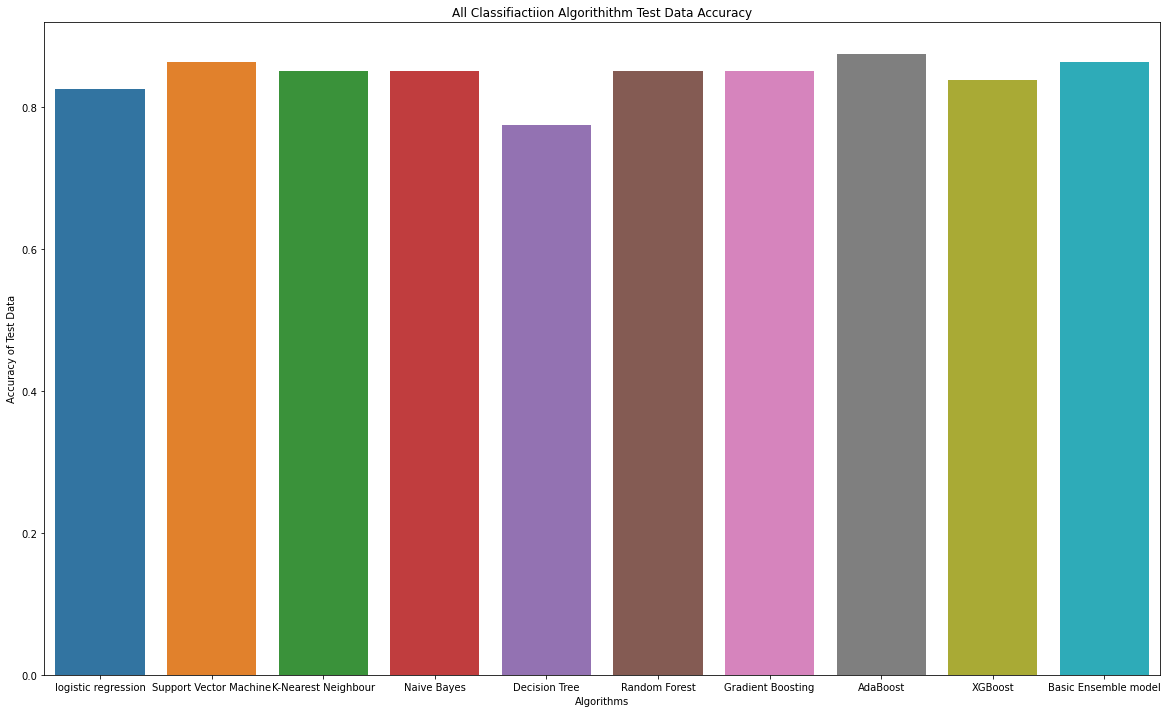

In [33]:
plt.figure(figsize=(20,12))
sns.barplot(df.Algorithm_Name,df.Accuracy_on_Test_Data)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy of Test Data')
plt.title('All Classifiactiion Algorithithm Test Data Accuracy')
plt.show()

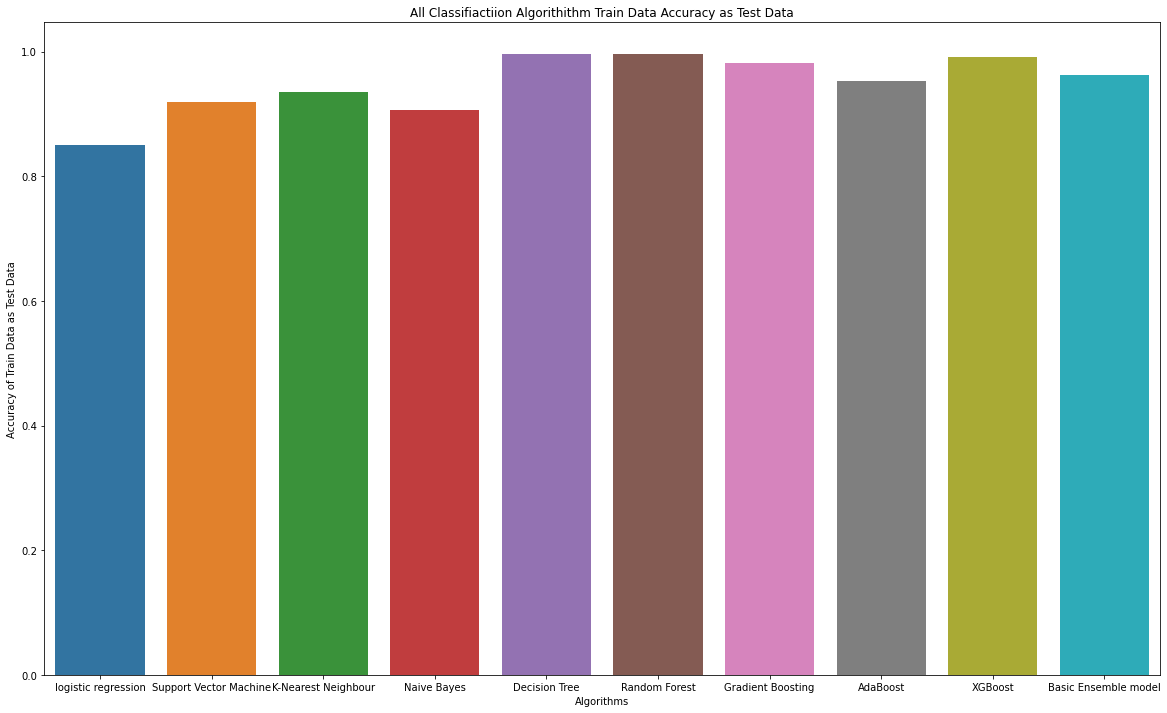

In [34]:
plt.figure(figsize=(20,12))
sns.barplot(df.Algorithm_Name,df.Accuracy_score_train)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy of Train Data as Test Data')
plt.title('All Classifiactiion Algorithithm Train Data Accuracy as Test Data')
plt.show()